# Explaining shots.csv

This dataframe contains all the shots taken in the top-5 leagues (2017-2018), Euros (2016) and the World cup (2018). <br>
These do not include penalties or free kicks. <br><br>

**playerId** : unique Id for each player provided by wyScout, additional information for these players can be easily found in players.json<br><br>
**id** : each event is provided with a unique id. <br><br> 
**x_coordinates** : x_coordinates of the location of each shot, the original data ranged from (0,100) I have normalized it to 105 as it is the average length of a football. This is the distance from the team's own goal. <br><br>
**y_coordinates** : y_coordinates of the location of each shot, the original data ranged from (0,100) I have normalized it to 68 as it is the average width of a football pitch. This is the distance from the right side (for the attacking team) of the pitch. <br><br>
**blocked** : 1 signifies the shot was blocked, 0 signifies it wasn't. <br><br>
**goal** : whether the shot resulted in a goal or not. <br><br>
**angles** : This is the angle (in degrees) subtended by the players field of view on the goal while taking a shot. Calculated using the cosine rule. The location of goalposts was taken from wyscout documentation and normalized according to our previous assumptions. <br><br>
**time** : Time (in minutes) at which the shot was taken. <br><br>
**matchPeriod**  : 0 signifies first half, 1 signified second half, 2 signifies extra time period 1 and 3 signifies extra time period 2. <br><br>
**bodypart** : 1(right foot), 2(left foot), 3(head) <br><br>
**counter** : whether the shot was taken during a counter attack. <br><br>
**competition** : <br> 0:England<br>
               1:France<br>
               2:Germany<br>
               3:Italy<br>
               4:World Cup<br>
               5:Spain<br>
               6:Euros<br><br>
**foot** : the preferred foot of player taking the shot. 1 = right , 0 =  left. <br><br>
**distance** : the distance of the shot location from the centre of the goal line. <br><br>
**preference** : <br> 1 signifies the shot has been taken with the player's preferred foot, or it is a header. <br> 0 signifies the shot has been taken with the player's non preferred foot.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mplsoccer import Pitch,VerticalPitch

In [5]:
shots=pd.read_csv('shots.csv')

In [6]:
shots.corr()

,playerId,id,x_coordinates,y_coordinates,blocked,goal,time,matchPeriod,counter,competition,foot,bodypart,preferrence,angles,distance,headers
playerId,1.000000,0.058048,-0.045414,0.009147,0.013499,-0.017948,0.022260,0.016678,0.013957,0.012353,-0.043956,-0.032620,0.005587,-0.052646,0.054620,-0.052559
id,0.058048,1.000000,0.029422,0.005084,0.002839,0.015339,0.005913,-0.004652,0.000490,-0.159136,-0.001131,-0.000459,0.001511,0.018479,-0.027497,-0.005335
x_coordinates,-0.045414,0.029422,1.000000,0.015878,-0.151263,0.223671,0.008897,0.007456,0.011860,0.002350,0.054305,0.303899,-0.035434,0.579988,-0.950182,0.361305
y_coordinates,0.009147,0.005084,0.015878,1.000000,-0.007020,0.006516,0.001439,0.001944,-0.000527,0.004339,0.063525,-0.049431,0.041886,0.034214,-0.035134,0.009871
blocked,0.013499,0.002839,-0.151263,-0.007020,1.000000,-0.190133,-0.006855,-0.005243,-0.016693,-0.023646,-0.019842,-0.153380,-0.042386,-0.169833,0.156545,-0.195090
goal,-0.017948,0.015339,0.223671,0.006516,-0.190133,1.000000,0.017276,0.019582,0.037209,-0.006151,0.005057,0.027361,-0.011328,0.331275,-0.256667,0.029759
time,0.022260,0.005913,0.008897,0.001439,-0.006855,0.017276,1.000000,0.830738,0.011324,-0.011111,-0.005296,-0.003975,-0.002378,0.008812,-0.013331,-0.005469
matchPeriod,0.016678,-0.004652,0.007456,0.001944,-0.005243,0.019582,0.830738,1.000000,0.011057,0.008084,-0.001521,-0.007551,-0.005832,0.000850,-0.008851,-0.010945
counter,0.013957,0.000490,0.011860,-0.000527,-0.016693,0.037209,0.011324,0.011057,1.000000,0.008807,-0.011574,-0.065222,-0.017473,-0.047034,0.002174,-0.084445
competition,0.012353,-0.159136,0.002350,0.004339,-0.023646,-0.006151,-0.011111,0.008084,0.008807,1.000000,-0.032474,0.015487,0.018447,-0.014077,0.005219,0.015792


In [8]:
sns.set(style="darkgrid")
sns.set_context('poster')


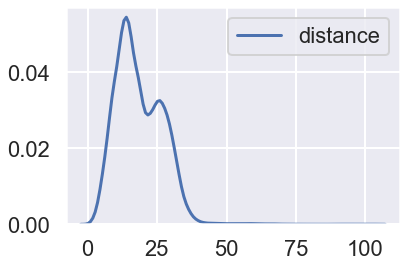

In [18]:
sns.kdeplot(shots['distance'])

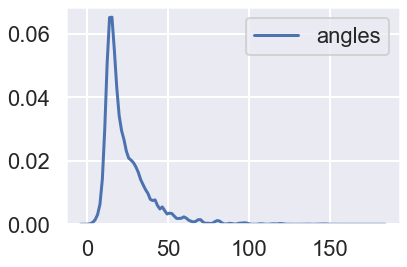

In [19]:
sns.kdeplot(shots['angles'])

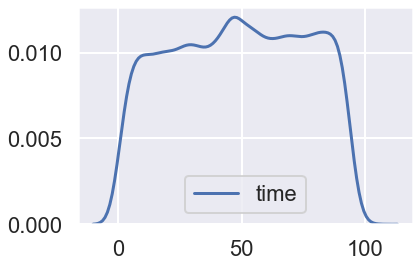

In [20]:
sns.kdeplot(shots['time'])

The plots above confirm most of the assumptions that one might have had. <br>
Most of the shots are taken from a distance of around 20 meters from the goal line, and there are almost no shots taken from a distance of 35 meters or more. <br>
The number of shots taken peak around the 45 minutes mark, which might be due to the teams not being settled in the beginning of the second half and the closing minutes of the first. <br>

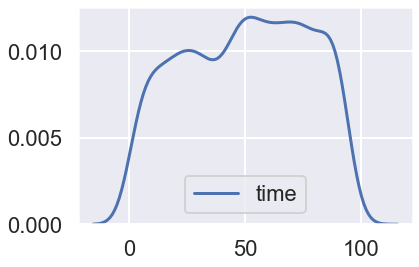

In [21]:
sns.kdeplot(shots.loc[shots['goal']==1].time)

<BarContainer object of 2 artists>

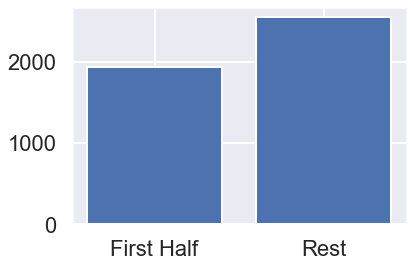

In [38]:
goals_1H=shots.loc[shots['matchPeriod']==0, 'goal'].sum()
goals=shots.loc[shots['goal']==1, 'goal'].sum()
goals_rest=goals-goals_1H
plt.bar(['First Half', 'Rest'],[goals_1H,goals_rest])

There is a substantial increase in the number of goals scored in the second half as compared to the first.

In [25]:
total_shots=shots.shape[0]
not_goals=total_shots-goals
goals_ca=shots.loc[shots['counter']==1, 'goal'].sum()
goals_headers=shots.loc[shots['headers']==1, 'goal'].sum()

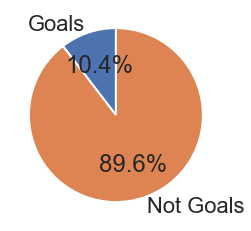

In [24]:
pie_goals=plt.pie([goals,not_goals],labels=['Goals','Not Goals'],
        shadow=False, startangle=90,autopct='%1.1f%%')

Only 10% of the total shots result in a goal.

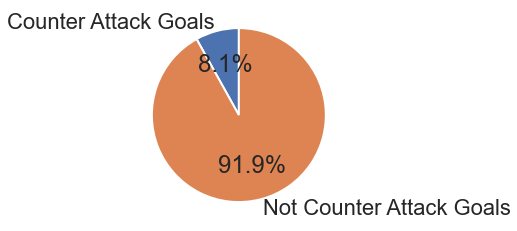

In [23]:
pie_counter=plt.pie([goals_ca,goals-goals_ca],labels=['Counter Attack Goals','Not Counter Attack Goals'],
        shadow=False, startangle=90,autopct='%1.1f%%')

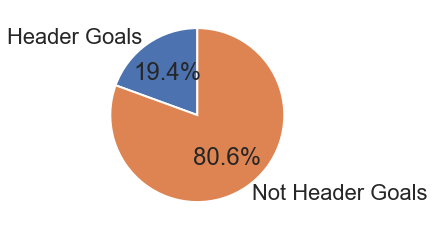

In [26]:
pie_counter=plt.pie([goals_headers,goals-goals_headers],labels=['Header Goals','Not Header Goals'],
        shadow=False, startangle=90,autopct='%1.1f%%')

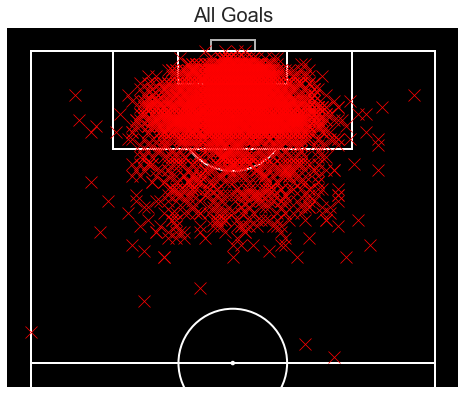

In [31]:
pitch = VerticalPitch(pitch_type='custom',half=True, goal_type='box', line_color='white', pitch_color='black', linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)

pitch.draw(figsize=(8,6))
sns.scatterplot(data=shots.loc[shots['goal']==1], y='x_coordinates', x='y_coordinates',alpha=1, color='red',legend=False, marker='x')
plt.title('All Goals', fontsize=20)
plt.savefig('all goals')


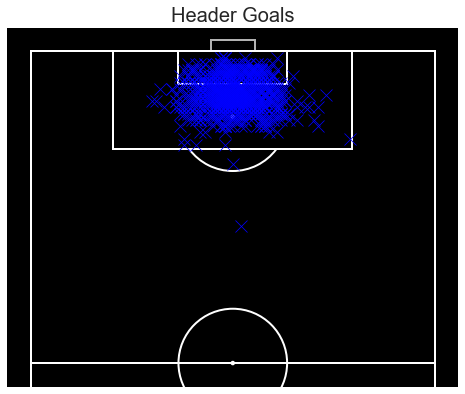

In [32]:
pitch = VerticalPitch(pitch_type='custom',half=True, goal_type='box', line_color='white', pitch_color='black', linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)

pitch.draw(figsize=(8,6))
sns.scatterplot(data=shots.loc[(shots['headers']==1)&(shots['goal']==1)], y='x_coordinates', x='y_coordinates',alpha=1, color='blue',legend=False, marker='x')
plt.title('Header Goals', fontsize=20)
plt.savefig('header_goals')